# Demo of endpoint donor_distribution (part 1)

Run the module "main.py" from the base project directory with program arguments: "server <db_user> <db_password>" after replacing <db_user> and <db_password> with appropriate values.

Prepare the request paramters by selecting the individuals located in the South Asian continent having regions aligned on assembly hg19, and query how they're distributed by gender and country of origin (population).

In [1]:
import json
param = {
    'distribute_by': [
        'gender',
        'population'
    ],
    'meta': {
        'health_status': "true",
        'super_population': ['SAS'],
        'assembly': 'hg19'
    }
}
body = json.dumps(param)
print(body)

{"distribute_by": ["gender", "population"], "meta": {"health_status": "true", "super_population": ["SAS"], "assembly": "hg19"}}


POST the endpoint \donor_distribution with the prepared JSON parameter

In [2]:
import requests

r = requests.post('http://127.0.0.1:5000/donor_distribution', json=param)
print(' response status code: {}'.format(r.status_code))
response_body = r.json()

response status code: 200


# Inspect response data:

In [3]:
import pandas as pd
from matplotlib import pyplot as plt
columns = response_body['columns']
rows = response_body['rows']
df = pd.DataFrame.from_records(rows, columns=columns)
df.fillna(value='', inplace=True)    # replaces Nones (== any value) with ''

df0 = df.pivot_table(df, ['POPULATION', 'GENDER'])
df0

DONORS
POPULATION GENDER        
                      494
           female     231
           male       263
BEB                    86
           female      44
           male        42
GIH                   106
           female      48
           male        58
ITU                   103
           female      43
           male        60
PJL                    96
           female      48
           male        48
STU                   103
           female      48
           male        55

It's a data cube with the numerosity of the individuals grouped by any combination of gender and population (to be intended as country of origin). 

It shows the total number of individuals selected (494), the total of males and females, and their distribution by single country.
We can visualize, for example, the distribution of the donors by country like so:

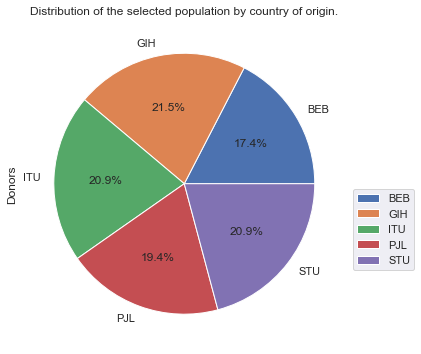

In [19]:
import seaborn as sns
# use Seaborn styles
sns.set()
df10 = df.drop(df.query('GENDER != "" | POPULATION == ""').index)  # remove rows where gender is not empty
df10.drop(['GENDER'], inplace=True, axis=1) # remove gender column
df10.pivot_table(df10, index=['POPULATION']).plot(
    kind='pie', 
    y='DONORS',
    figsize=(8, 6),
    autopct='%1.1f%%')
plt.title('Distribution of the studied population by country of origin.')
plt.legend(bbox_to_anchor=(1.0, 0.5))
plt.show()

Which highlights a very similar distribution of donors across the available countries.

We can also analyze more in depth the distributionof donors, considering the gender too:

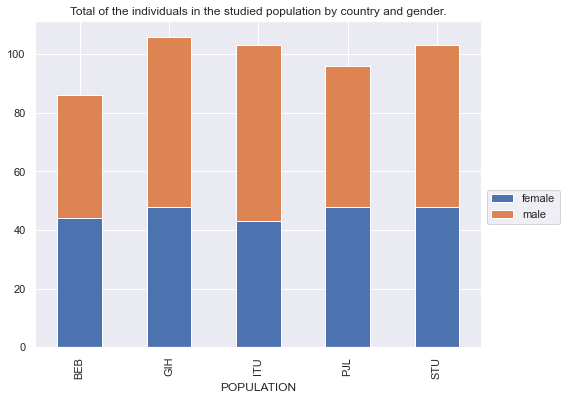

In [22]:
# prepare data frame
df2 = df.drop(df.query('GENDER == "" | POPULATION == "" ').index)    

df2_pivot = df2.pivot(index='POPULATION', columns='GENDER', values='DONORS') # creates a df with populations as index of rows, genders as columns, n° samples as cell values
df2_pivot.plot( # automatically uses the values of index as x-axis and stacks the values of columns
    kind='bar',
    stacked=True,
    figsize=(8, 6),
)
plt.title('Total of the individuals in the studied population by country and gender.')    
plt.legend(bbox_to_anchor=(1.0, 0.5))
plt.show()

The plots show that inside the SAS super-population, there's a substantially equal distribution of samples between males and females and between different countries. Open the notebook donor_distribution_part_2 to observe an example of diversification inside the same sample set.